In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input

In [38]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import GaussianNoise

In [39]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 70s 3us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


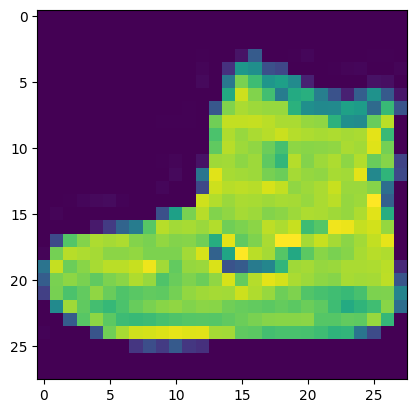

In [40]:
plt.imshow(X_train[0]);

In [41]:
X_train.max()

np.uint8(255)

In [42]:
X_train = X_train / 255
X_test = X_test / 255

In [43]:
X_train.shape

(60000, 28, 28)

In [44]:
encoder = Sequential([
    Input(shape=(28,28)),
    Flatten(),
    Dense(units=400, activation='relu'),
    Dense(units=200, activation='relu'),
    Dense(units=100, activation='relu'),
    Dense(units=50, activation='relu'),
    Dense(units=25, activation='relu'),
])

In [45]:
decoder = Sequential([
    Input(shape=(25,)),
    Dense(units=50, activation='relu'),
    Dense(units=100, activation='relu'),
    Dense(units=200, activation='relu'),
    Dense(units=400, activation='relu'),
    Dense(units=28*28, activation='sigmoid'),
    Reshape([28,28])
])

In [46]:
autoencoder = Sequential([encoder, decoder])

In [47]:
autoencoder.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [48]:
autoencoder.fit(X_train, X_train, epochs=10, batch_size=128, validation_data=[X_test, X_test])

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.0608 - loss: 0.4123 - val_accuracy: 0.0948 - val_loss: 0.3105
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0994 - loss: 0.3050 - val_accuracy: 0.1129 - val_loss: 0.3006
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1164 - loss: 0.2965 - val_accuracy: 0.1280 - val_loss: 0.2955
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.1277 - loss: 0.2927 - val_accuracy: 0.1304 - val_loss: 0.2930
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1355 - loss: 0.2906 - val_accuracy: 0.1405 - val_loss: 0.2916
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1399 - loss: 0.2884 - val_accuracy: 0.1427 - val_loss: 0.2886
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1451 - loss: 0.2862 - val_accuracy: 0.1490 - val_loss: 0.2874
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1535 - loss: 0.2845 - val_accuracy: 

In [49]:
generated_images = autoencoder.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


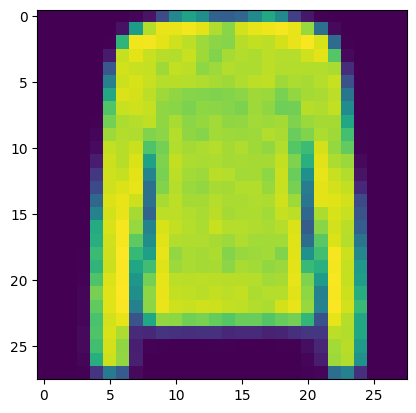

In [50]:
plt.imshow(generated_images[99]);

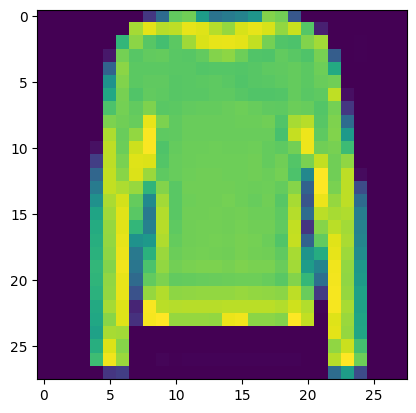

In [51]:
plt.imshow(X_test[99]);

In [52]:
sample = GaussianNoise(0.2)

In [53]:
noisey = sample(X_test[99], training=True)

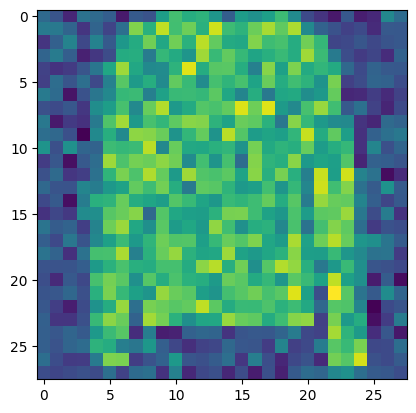

In [54]:
plt.imshow(noisey);

In [55]:
encoder = Sequential([
    Input(shape=(28,28)),
    Flatten(),
    GaussianNoise(0.2),
    Dense(units=400, activation='relu'),
    Dense(units=200, activation='relu'),
    Dense(units=100, activation='relu'),
    Dense(units=50, activation='relu'),
    Dense(units=25, activation='relu'),
])

In [56]:
decoder = Sequential([
    Input(shape=(25,)),
    Dense(units=50, activation='relu'),
    Dense(units=100, activation='relu'),
    Dense(units=200, activation='relu'),
    Dense(units=400, activation='relu'),
    Dense(units=28*28, activation='sigmoid'),
    Reshape([28,28])
])

In [57]:
noise_remover = Sequential([encoder, decoder])

In [58]:
noise_remover.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [59]:
noise_remover.fit(X_train, X_train, epochs=10, batch_size=128, validation_data=[X_test, X_test])

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.0620 - loss: 0.4116 - val_accuracy: 0.0926 - val_loss: 0.3174
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0984 - loss: 0.3090 - val_accuracy: 0.1047 - val_loss: 0.3059
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1133 - loss: 0.3015 - val_accuracy: 0.1338 - val_loss: 0.2990
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1302 - loss: 0.2968 - val_accuracy: 0.1404 - val_loss: 0.2949
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1415 - loss: 0.2929 - val_accuracy: 0.1477 - val_loss: 0.2926
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1491 - loss: 0.2912 - val_accuracy: 0.1575 - val_loss: 0.2907
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1560 - loss: 0.2905 - val_accuracy: 0.1658 - val_loss: 0.2888
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1618 - loss: 0.2881 - val_accuracy: 

In [60]:
noisey_images = sample(X_test, training=True)
denoised_images = noise_remover(noisey_images)

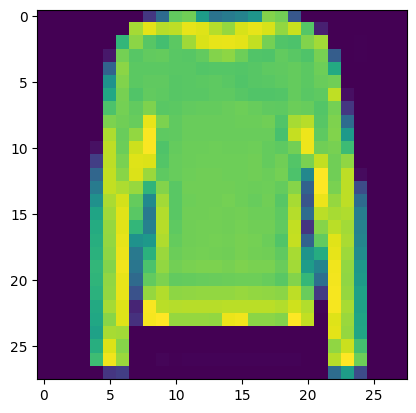

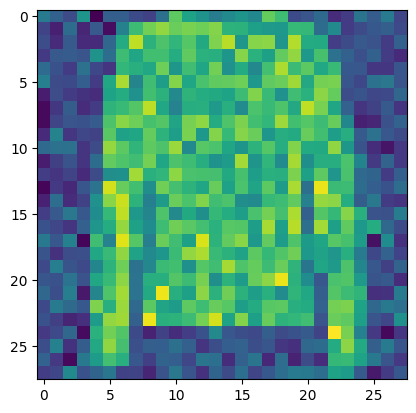

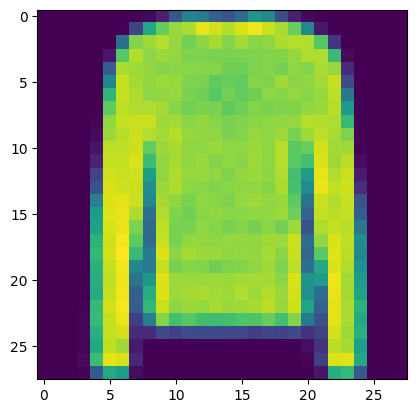

In [61]:
plt.imshow(X_test[99]);
plt.show()
plt.imshow(noisey_images[99]);
plt.show()
plt.imshow(denoised_images[99]);